# Week 5 Midterm Assignment: Census Data Exploration (Demographic Data)
# Group Name: Extreme Heat in Los Angeles
This week, I will attempt to plot some demographic data for the midterm
Author: Amanda Gormsen

I have downloaded the following demographic data:
1. Household Type (Including Living Alone) and Age of Householder (Renter-Occupied Housing Units) Name: A10004B
2. Unemployment Rate for Civilian Population in Labor Force 16 Years and Over Name: A17005
3. Residents Paying More Than 30% or at least 50% of Income on Rent Name: B18002
4. Residents Paying More Than 30% or at least 50% of Income on Selected Home Ownership Expenses Name: B10040
5. Poverty Status in 2020 for Population Age 18 to 64 Name: A13003B
6. Poverty Status in 2020 for Population Age 65 and Over Name: A13003C

I think I will try to focus on rent burden (B18002) and unemployment rate (A17005)

In [1]:
import os

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

Now, I will begin to clean the data for rent burden

In [4]:
df = pd.read_csv('R13296525_SL140.csv')

In [5]:
df.shape

(2498, 60)

In [6]:
df.head

<bound method NDFrame.head of         Geo_FIPS                                          Geo_QName  \
0     6037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1     6037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2     6037101220  Census Tract 1012.20, Los Angeles County, Cali...   
3     6037101221  Census Tract 1012.21, Los Angeles County, Cali...   
4     6037101222  Census Tract 1012.22, Los Angeles County, Cali...   
...          ...                                                ...   
2493  6037980038  Census Tract 9800.38, Los Angeles County, Cali...   
2494  6037980039  Census Tract 9800.39, Los Angeles County, Cali...   
2495  6037990100  Census Tract 9901, Los Angeles County, California   
2496  6037990200  Census Tract 9902, Los Angeles County, California   
2497  6037990300  Census Tract 9903, Los Angeles County, California   

     Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
0         ACSSF         ca         140  

leading zero for FIPS code was dropped, so i turned it into a string

In [7]:
df.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101220
3    6037101221
4    6037101222
Name: Geo_FIPS, dtype: int64

In [8]:
df = pd.read_csv(
    'R13296525_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [9]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_B18002_001,SE_B18002_002,SE_B18002_003,PCT_SE_B18002_002,PCT_SE_B18002_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,14000US06037101110,Census Tract 1011.10,NaN,NaN,NaN,644,179,175,27.80,27.17
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,14000US06037101122,Census Tract 1011.22,NaN,NaN,NaN,344,181,62,52.62,18.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,14000US06037101220,Census Tract 1012.20,NaN,NaN,NaN,762,198,210,25.98,27.56
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,14000US06037101221,Census Tract 1012.21,NaN,NaN,NaN,1140,346,410,30.35,35.96
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,14000US06037101222,Census Tract 1012.22,NaN,NaN,NaN,816,44,488,5.39,59.80


In [10]:
df = df.dropna(axis=1,how="all")

In [11]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_B18002_001,SE_B18002_002,SE_B18002_003,PCT_SE_B18002_002,PCT_SE_B18002_003
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,14000US06037101110,Census Tract 1011.10,644,179,175,27.80,27.17
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,14000US06037101122,Census Tract 1011.22,344,181,62,52.62,18.02
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,14000US06037101220,Census Tract 1012.20,762,198,210,25.98,27.56
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,14000US06037101221,Census Tract 1012.21,1140,346,410,30.35,35.96
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,14000US06037101222,Census Tract 1012.22,816,44,488,5.39,59.80


Now I need to clean up the data more and identify which columns to keep

In [12]:
columns_to_keep = ['Geo_FIPS',
                   'SE_B18002_001',
                   'SE_B18002_002',
                   'SE_B18002_003',
                  ]
# add it to a new dataframe
df2 = df[columns_to_keep]

In [13]:
df2.head()

,Geo_FIPS,SE_B18002_001,SE_B18002_002,SE_B18002_003
0,06037101110,644,179,175
1,06037101122,344,181,62
2,06037101220,762,198,210
3,06037101221,1140,346,410
4,06037101222,816,44,488


Now, I will rename the census columns to more accessible language

In [14]:
df2.columns = ['FIPS',
'Renter-Occupied Housing Units',
'Renter-Occupied Housing Units: 30 to 49 Percent',
'Renter-Occupied Housing Units: 50 percent or More',
]

In [15]:
df2.sample()

,FIPS,Renter-Occupied Housing Units,Renter-Occupied Housing Units: 30 to 49 Percent,Renter-Occupied Housing Units: 50 percent or More
16,06037103401,138,17,30


In [16]:
df2.head()

,FIPS,Renter-Occupied Housing Units,Renter-Occupied Housing Units: 30 to 49 Percent,Renter-Occupied Housing Units: 50 percent or More
0,06037101110,644,179,175
1,06037101122,344,181,62
2,06037101220,762,198,210
3,06037101221,1140,346,410
4,06037101222,816,44,488


It worked!

<AxesSubplot: ylabel='Frequency'>

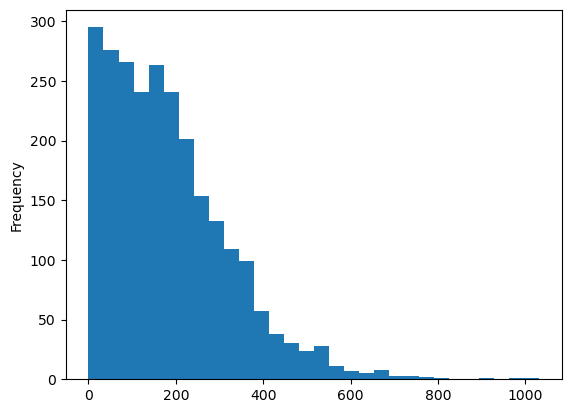

In [17]:
df2['Renter-Occupied Housing Units: 30 to 49 Percent'].plot.hist(bins=30)

Now, I think I will focus grapphing and plotting the rent burden 50% or greater to highlight renters who are most burdened and in need.

<AxesSubplot: ylabel='Frequency'>

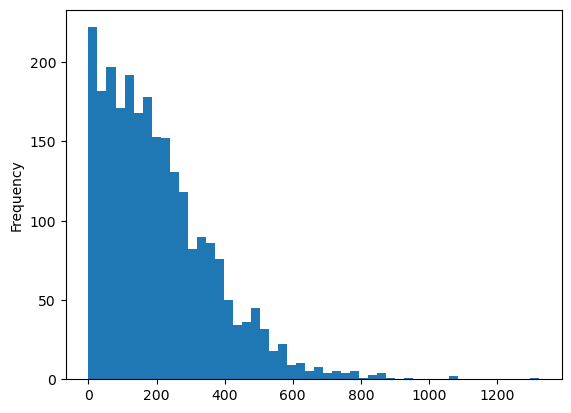

In [18]:
df2['Renter-Occupied Housing Units: 50 percent or More'].plot.hist(bins=50)

In [19]:
df_sorted = df2.sort_values(by='Renter-Occupied Housing Units: 50 percent or More',ascending = False)

In [43]:
df_sorted[['FIPS','Renter-Occupied Housing Units: 50 percent or More']].head(15)

,FIPS,Renter-Occupied Housing Units: 50 percent or More
2278,06037702900,1324
2239,06037700200,1066
1124,06037301601,1065
1123,06037301502,946
319,06037134905,896
606,06037207902,858
939,06037265303,855
1142,06037302401,852
2026,06037576200,849
472,06037191000,843


<AxesSubplot: title={'center': 'Rent Burden in Los Angeles: Renters Paying at least 50% of Income on Rent'}, xlabel='FIPS'>

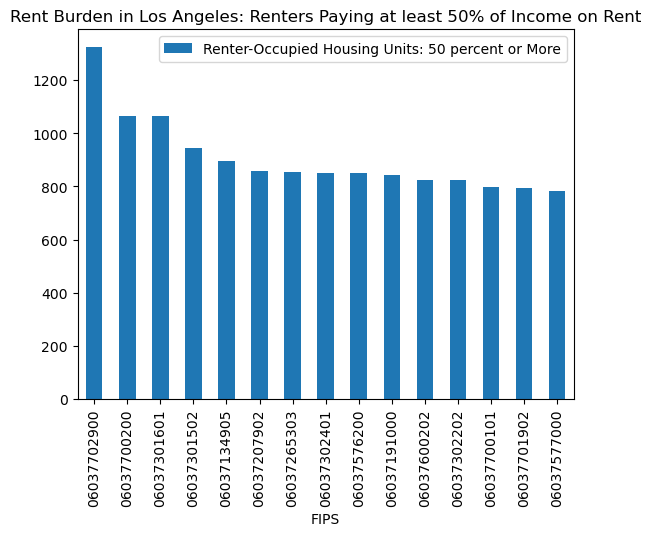

In [44]:
df_sorted.head(15).plot.bar(x='FIPS',
                            y='Renter-Occupied Housing Units: 50 percent or More',
                           title='Rent Burden in Los Angeles: Renters Paying at least 50% of Income on Rent')

<AxesSubplot: >

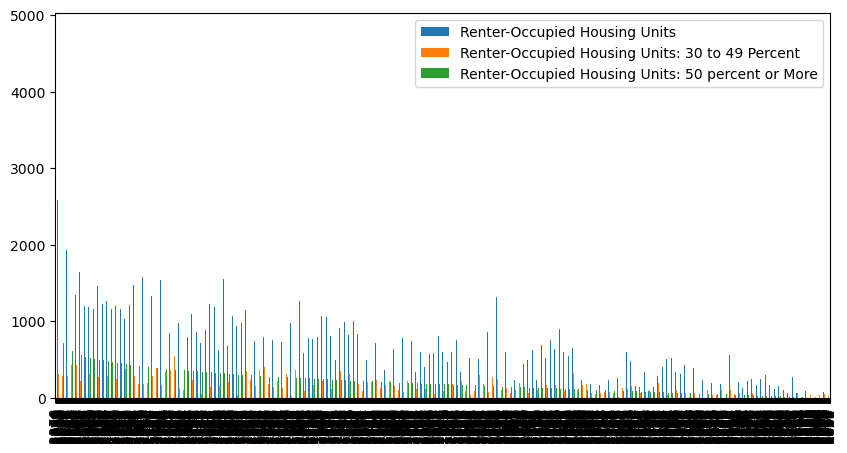

In [22]:
df_sorted.plot.bar(figsize=(10,5))

<AxesSubplot: >

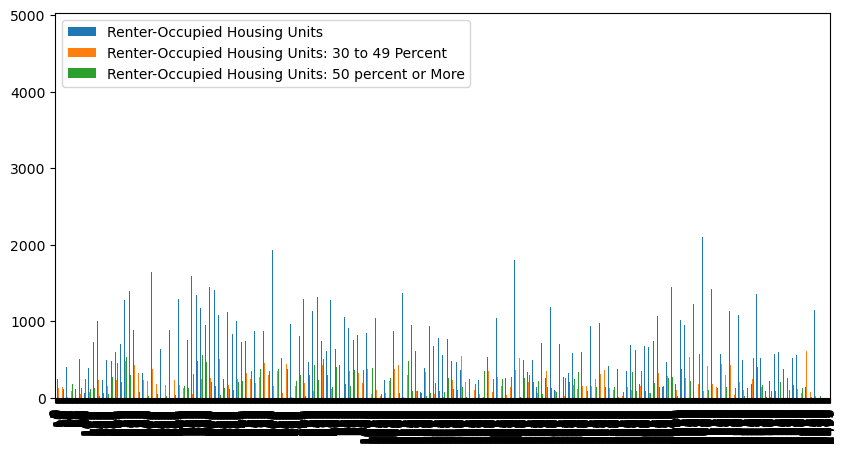

In [23]:
df2.plot.bar(figsize=(10,5))

These are still hard to read...

<AxesSubplot: >

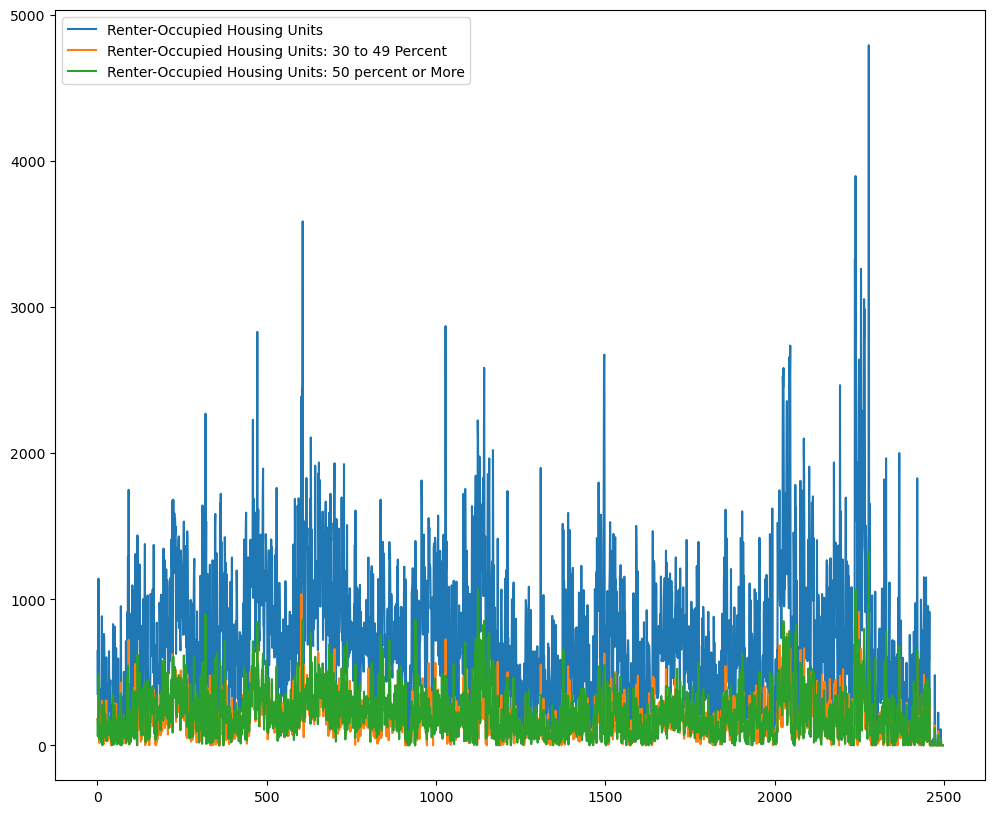

In [24]:
df2.plot(figsize=(12,10))

<AxesSubplot: xlabel='FIPS'>

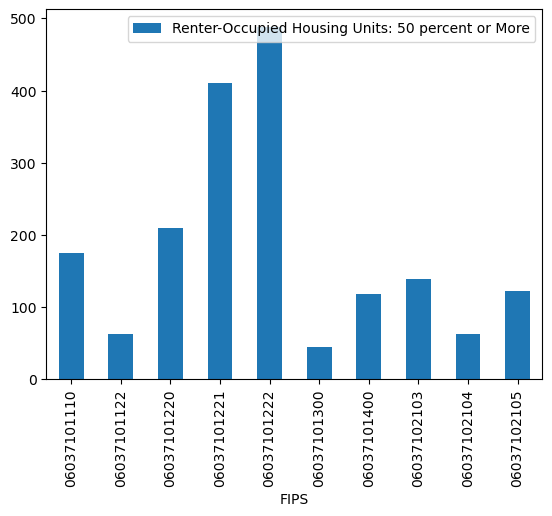

In [25]:
df2.head(10).plot.bar(x='FIPS', 
             y='Renter-Occupied Housing Units: 50 percent or More')

Based on the sorted data, I have identified the census tracts with the highest amount of housing units with renters paying at least 50% or more of income on rent:
1. Census Tract 7029, Los Angeles County, California (6037702900) = Marina del Rey 
2. Census Tract 7002, Los Angeles County, California (6037700200) = West Hollywood
3. Census Tract 3016.01, Los Angeles County, California (06037301601) = Grand Central, Glendale 
4. Census Tract 3015.02, Los Angeles County, California (06037301502) = Grandview, Glendale 
5. Census Tract 1349.05, Los Angeles County, California (06037134905) = Woodland Hills
6. Census Tract 2079.02, Los Angeles County, California (06037207902) = South Park/Fashion District
7. Census Tract 2653.03, Los Angeles County, California (06037265303) = Westwood
8. Census Tract 3024.01, Los Angeles County, California (06037302401) = Tropico/Pacific-Edison, Glendale 
9. Census Tract 5762, Los Angeles County, California (06037576200) = East Village, Long Beach
10. Census Tract 1910, Los Angeles County, California (06037191000) = Hollywood
11. Census Tract 6002.02 (06037600202) = Westmont
12. Census Tract 3022.02 (06037302202) = Mariposa
13. Census Tract 7001.01 (06037700101) = West Hollywood
14. Census Tract 7019.02 (06037701902) = Santa Monica
15. Long Beach too

I want to breakdown my data set by neighborhood so I am making lists of all the fips codes that fall into each neihgborhood of interest for the top 10-15 or so rent-burdened sites

In [36]:
Marina_del_Rey = ['6037702900']

In [37]:
West_Hollywood = ['6037700200']

In [46]:
Grand_Central = ['06037301601']

In [49]:
Grandview = ['06037301502']

In [38]:
Woodland_Hills = ['06037134905']

In [39]:
South_Park_Fashion_District = ['06037207902']

In [40]:
Westwood = ['06037265303']

In [56]:
Tropico_Pacific_Edison = ['06037302401']

In [57]:
East_Village = ['06037576200']

In [41]:
Hollywood = ['06037191000']

In [42]:
Westmont = ['06037600202']

In [58]:
Mariposa = ['06037302202']

In [61]:
Marina_del_Rey=df2.loc[df2['FIPS'].isin(Marina_del_Rey)]
West_Hollywood=df2.loc[df2['FIPS'].isin(West_Hollywood)]
Grand_Central=df2.loc[df2['FIPS'].isin(Grand_Central)]
Grandview=df2.loc[df2['FIPS'].isin(Grandview)]
Woodland_Hills=df2.loc[df2['FIPS'].isin(Woodland_Hills)]
South_Park_Fashion_District=df2.loc[df2['FIPS'].isin(South_Park_Fashion_District)]
Westwood=df2.loc[df2['FIPS'].isin(Westwood)]
Tropico_Pacific_Edison=df2.loc[df2['FIPS'].isin(Tropico_Pacific_Edison)]
East_Village=df2.loc[df2['FIPS'].isin(East_Village)]
Hollywood=df2.loc[df2['FIPS'].isin(Hollywood)]
Westmont=df2.loc[df2['FIPS'].isin(Westmont)]
Mariposa=df2.loc[df2['FIPS'].isin(Mariposa)]

In [75]:
['neighborhood'] = ['Marina_del_Rey', 
              'West_Hollywood', 
              'Grand_Central', 
              'Grandview',
              'Woodland_Hills',
              'South_Park_Fashion_District',
              'Westwood', 
              'Tropico_Pacific_Edison', 
              'East_Village',
              'Hollywood',
              'Westmont'
              'Mariposa',]

SyntaxError: cannot assign to literal (2301214223.py, line 1)

In [ ]:
df_sorted.head(12).plot.bar(x='neighborhood',
                            y='Renter-Occupied Housing Units: 50 percent or More',
                           title='Rent Burden in Los Angeles: Renters Paying at least 50% of Income on Rent')

KeyError: 'neighborhood'